# This tutorial will show how to use wnnet module in python. 

To begin, import the packages by typing:

In [56]:
import wnnet.net as wn
import wnnet.nuc as wnuc
import wnnet.consts as wc
import wnnet.reac as wr
import wnnet.flows as wf
import wnnet.zones as wz
import wnnet.graph as wg

### Compute physical constants

This module contains the physical constants such as the speed of light and Boltzmann's constant used in the calculations for
the wnnet package.  webnucleo codes use constants defined in the GNU Scientific
Library (GSL).  For consistency, the wnnet package uses the same constants,
which are defined here.

In [57]:
print('Speed of light in cm/s :', wc.c)
print('Unit Transfer from Energy to Mev :', wc.ergs_to_MeV)
print('Boltzman Constant :', wc.GSL_CONST_CGS_BOLTZMANN)
print('Mass of Electron :', wc.GSL_CONST_CGS_MASS_ELECTRON)

Speed of light in cm/s : 29979245800.0
Unit Transfer from Energy to Mev : 624150.9647120418
Boltzman Constant : 1.3806504e-16
Mass of Electron : 9.10938188e-28


### Compute nuclide data

Frist, we need to have a xml file that includes all of the nuclear and reaction data. For example, type:

In [58]:
net = wn.Net("out.xml")

You can retrieve the nuclide data in the webnucleo XML file by typing:

In [59]:
nuclides = net.get_nuclides()

This returns a dictionary of data with the key being the nuclide name. Here we will show the first two nuclides. For each nuclide, the attributes are nuclide name, z, n, a and et al, which can be found below. 

In [60]:
example = list(nuclides.items())[:2]

for keys, nuclide in example:
    print('Nuclide Name :', keys)
    for attribute, value in nuclide.items():
        print('{} : {}'.format(attribute, value))
    print()

Nuclide Name : h2
z : 1
a : 2
n : 1
state : 
source : ame11
mass excess : 13.136
spin : 1.0
t9 : [ 0.1   0.15  0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.5
  2.    2.5   3.    3.5   4.    4.5   5.    6.    7.    8.    9.   10.  ]
partf : [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]

Nuclide Name : h3
z : 1
a : 3
n : 2
state : 
source : ame11
mass excess : 14.95
spin : 0.5
t9 : [ 0.1   0.15  0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.5
  2.    2.5   3.    3.5   4.    4.5   5.    6.    7.    8.    9.   10.  ]
partf : [2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.]



You may print out all the data for a specific nuclide, say, o16, by typing:

In [61]:
print(nuclides['o16'])

{'z': 8, 'a': 16, 'n': 8, 'state': '', 'source': 'ame11', 'mass excess': -4.737, 'spin': 0.0, 't9': array([ 0.1 ,  0.15,  0.2 ,  0.3 ,  0.4 ,  0.5 ,  0.6 ,  0.7 ,  0.8 ,
        0.9 ,  1.  ,  1.5 ,  2.  ,  2.5 ,  3.  ,  3.5 ,  4.  ,  4.5 ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  ]), 'partf': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1.])}


To get a specific property of a nuclide, like mass excess or data source, try typing:

In [62]:
print(nuclides['o16']['mass excess'])
print(nuclides['o16']['source'])

-4.737
ame11


To get the partition function of a muclide at different temperature, try type

In [63]:
print('Temprature in GK :', nuclides['ca40']['t9'])
print('Partition function :', nuclides['ca40']['partf'])

Temprature in GK : [ 0.1   0.15  0.2   0.3   0.4   0.5   0.6   0.7   0.8   0.9   1.    1.5
  2.    2.5   3.    3.5   4.    4.5   5.    6.    7.    8.    9.   10.  ]
Partition function : [1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.00999999 1.03999991 1.09000001 1.19999987 1.37999973]


We can also compute the partition function for a nuclide at a specific temperature directly by typing:

In [64]:
pf = net.compute_nuclear_partition_function('o18', 2)
print('The partition function of o18 at teperature T9 = 2 is :', pf)

The partition function of o18 at teperature T9 = 2 is : 1.0


To get the quantum abundance of the nuclide at the input temperature (GK) and density (g/cc).

In [65]:
Y_Q = net.compute_quantum_abundance('o16', 0.2, 10)
print('The quantum abundance of o16 at T9 = 0.2 and $\rho$ = 10 is :', '{:.2f}'.format(Y_Q))

ho$ = 10 is : 5646352130.476 at T9 = 0.2 and $


You can also compute the binding energy (MeV) of a species by typing.

In [66]:
B = net.compute_binding_energy('ca40')
print('The binding energy of ca40 is :', B)

The binding energy of ca40 is : 342.046


### Read the reaction data
You can retrieve the reaction data in a network calculation by typing:

In [67]:
reactions = net.get_reactions()

This returns a dictionart with the key being the reactions string and each value being a reaction. To see a list of the reactions (here shows the first four reactions), type:

In [68]:
for r in list(reactions.items())[0:4]:
    print(r)

('fe79 -> co79 + electron + anti-neutrino_e', <wnutils.xml.Reaction object at 0x128017eb0>)
('he4 + cu51 -> h1 + zn54', <wnutils.xml.Reaction object at 0x1233c7610>)
('he4 + ne18 -> mg22 + gamma', <wnutils.xml.Reaction object at 0x12805cc70>)
('h1 + cl54 -> n + ar54', <wnutils.xml.Reaction object at 0x128188c40>)


You can also check whether one reaction is weak reaction or not, by typing:

In [69]:

for r, value in list(reactions.items())[:4]:
    print(r)
    print(net.is_weak_reaction(r))


fe79 -> co79 + electron + anti-neutrino_e
True
he4 + cu51 -> h1 + zn54
False
he4 + ne18 -> mg22 + gamma
False
h1 + cl54 -> n + ar54
False


You can use an XPath expression to select the reactions with specific reactants and products. For example, you can type:

In [70]:
induced_reac_xpath = "[(reactant = 'n' and product = 'gamma') or (product = 'electron') or (reactant = 'electron') or (product = 'positron')]"
induced_reactions = net.get_reactions(reac_xpath=induced_reac_xpath)

This will return a dictionary of reactions that includes the specific reactants and products. We can print it out by typing:

In [71]:
for key, value in list(induced_reactions.items())[:4]:
    print('reaction :', key)

reaction : fe79 -> co79 + electron + anti-neutrino_e
reaction : ne33 -> n + n + na31 + electron + anti-neutrino_e
reaction : cr70 -> n + n + n + mn67 + electron + anti-neutrino_e
reaction : co86 -> n + n + ni84 + electron + anti-neutrino_e


You may choose a particular reaction from the dictionary and see the properties of this reaction by typing:

In [72]:
reac = reactions['n + ni80 -> ni81 + gamma']
print('Reactants :', reac.reactants)
print('Products :', reac.products)
print('Source :', reac.source)

Reactants : ['n', 'ni80']
Products : ['ni81', 'gamma']
Source : rath


You can also compute the rate for the reaction above (among interacting multiplets and assuming one of the standard rate forms single_rate, rate_table, or non_smoker_fit) at a variety of temperatures by typing:

In [73]:
import numpy as np
t9s = np.power(10., np.linspace(-2, 1, 10))
for t9 in t9s:
    print('Temperature :', '{:.2f}'.format(t9), '; ', 'Reaction rate :', '{:.4f}'.format(reac.compute_rate(t9))) 

Temperature : 0.01 ;  Reaction rate : 3.4799
Temperature : 0.02 ;  Reaction rate : 3.8118
Temperature : 0.05 ;  Reaction rate : 3.7454
Temperature : 0.10 ;  Reaction rate : 3.5000
Temperature : 0.22 ;  Reaction rate : 3.3896
Temperature : 0.46 ;  Reaction rate : 3.8817
Temperature : 1.00 ;  Reaction rate : 6.4353
Temperature : 2.15 ;  Reaction rate : 19.8628
Temperature : 4.64 ;  Reaction rate : 112.4717
Temperature : 10.00 ;  Reaction rate : 169.9516


### Read nuclear reaction network data
One can read a local reaction network by setting reduced nuclides Xpath and reduced reactions Xpath. Here is an example.

In [74]:
induced_nuc_xpath = "[z >= 20 and a - z >= 20 and z <= 25 and a - z <= 25]"
induced_reac_xpath = "[(reactant = 'n' and product = 'gamma') or (product = 'electron') or (reactant = 'electron') or (product = 'positron')]"

The first line selects nuclides with proton number larger or equal to 20 and smaller or equal to 25, with neutron number larger or equal to 25 and smaller or equal to 25.  The second chooses reactions with the specified reactants and products.

With those selected nuclides and their reactions, one can compute the reaction Q values (the amount of energy absorbed or released during the nuclear reaction) by typing:

In [75]:
Q_value = net.compute_Q_values(induced_nuc_xpath, induced_reac_xpath)

This will return a dictionary with keys being the reaction strings and values storing the Q values. The following command shows the first four reactions and the corresponding Q values.

In [76]:
for reac, Q in list(Q_value.items())[:10]:
    print('Reaction :', reac, '  ', 'Q_value :', '{:.2f}'.format(Q))

Reaction : mn47 -> cr47 + positron + neutrino_e    Q_value : 11.90
Reaction : ca45 -> sc45 + electron + anti-neutrino_e    Q_value : 0.26
Reaction : ti44 -> sc44 + positron + neutrino_e    Q_value : 0.27
Reaction : ti43 -> sc43 + positron + neutrino_e    Q_value : 6.87
Reaction : cr44 -> v44 + positron + neutrino_e    Q_value : 10.65
Reaction : mn46 -> cr46 + positron + neutrino_e    Q_value : 16.96
Reaction : ti42 -> sc42 + positron + neutrino_e    Q_value : 7.02
Reaction : cr47 -> v47 + positron + neutrino_e    Q_value : 7.45
Reaction : cr45 -> v45 + positron + neutrino_e    Q_value : 12.44
Reaction : sc44 -> ca44 + positron + neutrino_e    Q_value : 3.65


One can compute the forward and reverse rates of a collection of reactions at a specific temperature. 

In [77]:
reac_rates = net.compute_rates(2, induced_nuc_xpath, induced_reac_xpath)


This will return a dictionary containing the rates.  The key is the reaction string while the value is a two-element tuple with the first element being the forward rate and the second element being the reverse rate.

In [78]:
for key, values in list(reac_rates.items())[:8]:
    print('reaction :', key, ';', 'Forward rate :', '{:.2e}'.format(values[0]), ';', 'Reverse rate :', '{:.2e}'.format(values[1]))

reaction : mn47 -> cr47 + positron + neutrino_e ; Forward rate : 7.88e+00 ; Reverse rate : 0.00e+00
reaction : ca45 -> sc45 + electron + anti-neutrino_e ; Forward rate : 4.95e-08 ; Reverse rate : 0.00e+00
reaction : ti44 -> sc44 + positron + neutrino_e ; Forward rate : 3.67e-10 ; Reverse rate : 0.00e+00
reaction : ti43 -> sc43 + positron + neutrino_e ; Forward rate : 1.36e+00 ; Reverse rate : 0.00e+00
reaction : cr44 -> v44 + positron + neutrino_e ; Forward rate : 1.39e+01 ; Reverse rate : 0.00e+00
reaction : mn46 -> cr46 + positron + neutrino_e ; Forward rate : 8.23e+00 ; Reverse rate : 0.00e+00
reaction : ti42 -> sc42 + positron + neutrino_e ; Forward rate : 3.48e+00 ; Reverse rate : 0.00e+00
reaction : cr47 -> v47 + positron + neutrino_e ; Forward rate : 1.39e+00 ; Reverse rate : 0.00e+00


### Read the reaction flow data
This module calculates the reaction flows in a network based on a given set of mass fractions, input temperature, and density. Here we will use the 'out.xml' as an example file.

In [79]:
zone_data = wz.Zones_Xml("out.xml")

To retrieve data objects for all zones, simply execute the command:

In [80]:
my_zone_xpath = ""
zones = zone_data.get_zones(zone_xpath=my_zone_xpath)

When executed, this module will generate a dictionary containing the flows for all zones in the network. Each zone in the dictionary will have its zone number and all associated properties. If we only need data for a specific range of zones (for instance, zones 20 to 30), we can retrieve the data objects for those zones by using the following command:

In [81]:
my_zone_xpath = "[position() >= 20 and position() <= 25]"
zones = zone_data.get_zones(zone_xpath=my_zone_xpath)

Now, you can compute the flow data in those selected zones by typing:

In [82]:
f = wf.compute_flows_for_zones(net, zones)

9.99999874559267 999999623.6778481
9.999979487919065 999993846.388342
9.999664311754325 999899296.9068575
9.994507380757929 998353119.1276567
9.910483232773139 973384650.0600045
9.422705927723303 836617437.7952784


When executed, this command will generate a dictionary for the selected zones, where each zone will contain a sub-dictionary storing its respective flow data. Specifically, the first three reactions for each zone will be displayed.

In [83]:
for key, value in f.items():
    print('Zone Number :', key)
    for attri, flows in list(value.items())[:3]:
        print('Reaction :', attri)
        print('Forward flow, Reverse flow:', flows)

Zone Number : 19
Reaction : fe79 -> co79 + electron + anti-neutrino_e
Forward flow, Reverse flow: (0.0, 0)
Reaction : he4 + cu51 -> h1 + zn54
Forward flow, Reverse flow: (2.2328650857251786e-21, 2.2328650816971593e-21)
Reaction : he4 + ne18 -> mg22 + gamma
Forward flow, Reverse flow: (0.8252171550636851, 0.8252171500823714)
Zone Number : 20
Reaction : fe79 -> co79 + electron + anti-neutrino_e
Forward flow, Reverse flow: (0.0, 0)
Reaction : he4 + cu51 -> h1 + zn54
Forward flow, Reverse flow: (2.232904023625878e-21, 2.2329039576714334e-21)
Reaction : he4 + ne18 -> mg22 + gamma
Forward flow, Reverse flow: (0.8252054279335845, 0.8252053511252605)
Zone Number : 21
Reaction : fe79 -> co79 + electron + anti-neutrino_e
Forward flow, Reverse flow: (0.0, 0)
Reaction : he4 + cu51 -> h1 + zn54
Forward flow, Reverse flow: (2.2335416900510624e-21, 2.233540611286575e-21)
Reaction : he4 + ne18 -> mg22 + gamma
Forward flow, Reverse flow: (0.8250135421994044, 0.8250122907430042)
Zone Number : 22
Reactio

Typically, we are interested in the reaction flow at a specific time step, rather than calculating all reaction flows. To achieve this, it is necessary to select the appropriate zone to obtain the data for that specific time step.

In [84]:
zone_20 = zone_data.get_zones(zone_xpath="[position() = 20]")


This will return a dictionary including the zone number 19 and all the properties like temperature, density, mass fraction, timestep et al. For this zone, we can compute abundance flows by typing. 

In [85]:
f = wf.compute_flows_for_zones(net, zone_20)

9.99999874559267 999999623.6778481


Upon execution, this command will generate a dictionary with keys representing reaction strings and values consisting of tuples showing the forward and reverse flows for each reaction. To print the first four reactions in zone 20, use the following command:

In [86]:
for key, value in f.items():
    print('Zone Number :', key)
    for attri, flows in list(value.items())[:4]:
        print('Reaction :', attri)
        print('Forward flow, Reverse flow:', flows)

Zone Number : 19
Reaction : fe79 -> co79 + electron + anti-neutrino_e
Forward flow, Reverse flow: (0.0, 0)
Reaction : he4 + cu51 -> h1 + zn54
Forward flow, Reverse flow: (2.2328650857251786e-21, 2.2328650816971593e-21)
Reaction : he4 + ne18 -> mg22 + gamma
Forward flow, Reverse flow: (0.8252171550636851, 0.8252171500823714)
Reaction : h1 + cl54 -> n + ar54
Forward flow, Reverse flow: (0.0, 0.0)


It is useful to compute the link between the reactants (source vertex) and products (reverse vertex) in reactions. In the analysis of branchings, we will use thoes link flows to create branching graph. As an example, we could compute all of the flow links in zone 20. 

In [87]:
f = wf.compute_link_flows_for_zones(net, zone_20, include_dt=True)

This will return a dictionary with keys being the reaction string and values being a tuple showing the source vertex, target vertex and the link weight.

In [88]:
for i in f:
    print('Zone number :', i)
    for key, value in list(f[i].items())[:4]:
        print('Reaction :', key)
        print('(Source, Target, Weight) :', value)

Zone number : 19
Reaction : fe79 -> co79 + electron + anti-neutrino_e
(Source, Target, Weight) : [('fe79', 'co79', 4.031420405905884e-57)]
Reaction : he4 + cu51 -> h1 + zn54
(Source, Target, Weight) : [('he4', 'h1', 5.515580763861842e-29), ('he4', 'zn54', 5.515580763861842e-29), ('cu51', 'h1', 33642.79572539579), ('cu51', 'zn54', 33642.79572539579), ('h1', 'he4', 4.4838254112089505e-28), ('h1', 'cu51', 4.4838254112089505e-28), ('zn54', 'he4', 4.145830198600107), ('zn54', 'cu51', 4.145830198600107)]
Reaction : he4 + ne18 -> mg22 + gamma
(Source, Target, Weight) : [('he4', 'mg22', 2.0384356831840677e-08), ('ne18', 'mg22', 410.94170366045404), ('mg22', 'he4', 235.611610503992), ('mg22', 'ne18', 235.611610503992)]
Reaction : h1 + cl54 -> n + ar54
(Source, Target, Weight) : [('h1', 'n', 0.0), ('h1', 'ar54', 0.0), ('cl54', 'n', 9646060.038843459), ('cl54', 'ar54', 9646060.038843459), ('n', 'h1', 0.0), ('n', 'cl54', 0.0), ('ar54', 'h1', 1.4215098556889765e-05), ('ar54', 'cl54', 1.421509855688

If we would like to compute the link flows for a set of zones, we can replace the zone 20 to a group of zones by typing: 

In [89]:
f = wf.compute_link_flows_for_zones(net, zones, include_dt=True)

This will return a dictionary with keys being the zone numbers. In each zone, there is a dictionary with keys the reaction strings and a tuple showing (Source, Target, Weight). The commands below show the first two reactions in each zone.  

In [90]:
for i in f:
    print('Zone number :', i)
    for key, value in list(f[i].items())[:2]:
        print(key, value)

Zone number : 19
fe79 -> co79 + electron + anti-neutrino_e [('fe79', 'co79', 4.031420405905884e-57)]
he4 + cu51 -> h1 + zn54 [('he4', 'h1', 5.515580763861842e-29), ('he4', 'zn54', 5.515580763861842e-29), ('cu51', 'h1', 33642.79572539579), ('cu51', 'zn54', 33642.79572539579), ('h1', 'he4', 4.4838254112089505e-28), ('h1', 'cu51', 4.4838254112089505e-28), ('zn54', 'he4', 4.145830198600107), ('zn54', 'cu51', 4.145830198600107)]
Zone number : 20
fe79 -> co79 + electron + anti-neutrino_e [('fe79', 'co79', 6.598039281994456e-56)]
he4 + cu51 -> h1 + zn54 [('he4', 'h1', 9.027299230507783e-28), ('he4', 'zn54', 9.027299230507783e-28), ('cu51', 'h1', 550600.0256674776), ('cu51', 'zn54', 550600.0256674776), ('h1', 'he4', 7.338600724467003e-27), ('h1', 'cu51', 7.338600724467003e-27), ('zn54', 'he4', 67.85017476051561), ('zn54', 'cu51', 67.85017476051561)]
Zone number : 21
fe79 -> co79 + electron + anti-neutrino_e [('fe79', 'co79', 1.079870566288894e-54)]
he4 + cu51 -> h1 + zn54 [('he4', 'h1', 1.4780

### Create network graph 

This section will show how to create a network graph. Firstly, we can get all of the nuclides in the network calculation by typing:

In [91]:
graph_nuclides = net.get_nuclides(nuc_xpath="")

If the full graph is not necessary, it is possible to generate a subgraph containing only specific nuclides and reactions by setting the nuc_xpath parameter accordingly. This can be achieved by typing:

In [92]:
graph_nuclides = net.get_nuclides(nuc_xpath="[z >= 20 and z <= 30 and a - z >= 20 and a - z <= 40]")
induced_reac_xpath = "[(reactant = 'n' and product = 'gamma') or (product = 'electron') or (reactant = 'electron') or (product = 'positron')]"

In order to create a well-organized graph, it is important to set the location of each nuclide to (N, Z) coordinates. Here, we will display the first four vertices by executing the following command:

In [93]:
for sp, attri in list(graph_nuclides.items())[:4]:
    print(
        "Add",
        sp,
        "as vertex in graph at position (",
        (graph_nuclides[sp]["a"] - graph_nuclides[sp]["z"]),
        ", ",
        graph_nuclides[sp]["z"],
        ")",
    )

Add ca40 as vertex in graph at position ( 20 ,  20 )
Add ca41 as vertex in graph at position ( 21 ,  20 )
Add ca42 as vertex in graph at position ( 22 ,  20 )
Add ca43 as vertex in graph at position ( 23 ,  20 )


We can set the title and corresponding attributes of the graph by typing:

In [94]:
graph_attributes = {
    "label": "My Network Graph",
    "labelloc": "t",
    "fontsize": 30,
    "fontcolor": "blue",
}

We can also set the properties of the vertex edge, vertex node, and special node. 

In [95]:
edge_attributes = {"penwidth": 2}

node_attributes = {"style": "filled", "fillcolor": "bisque"}

special_attributes = {
    "fe56": {"fillcolor": "green", "shape": "oval", "style": "filled"}
}

We can change the propoerties of a list of nuclei to be different with others, like solar data.

In [96]:
solar_attributes = {"fillcolor": "white", "style": "filled"}

It is often desirable to display different types of reactions in a graph using distinct colors. To accomplish this, a color tuple can be defined to specify the color for specific reaction types.

In [97]:

color_tuples = [
    ("[product = 'electron']", "blue"),
    ("[(reactant = 'electron') or (product = 'positron')]", "red"),
]

Now, we can create the network graph with all the properties we have set above.

In [98]:

my_graph = wg.create_network_graph(
    net,
    direction= "forward", #"forward",   # or "reverse" or "both"
    induced_nuc_xpath=induced_nuc_xpath,
    induced_reac_xpath=induced_reac_xpath,
    reaction_color_tuples=color_tuples,
    graph_attributes=graph_attributes,
    allow_isolated_species=True,
    edge_attributes=edge_attributes,
    node_attributes=node_attributes,
    solar_node_attributes=solar_attributes,
    special_node_attributes=special_attributes,
)

After setting the graph with the desired nuclides, reactions and attributes, the networkx Python module needs to be imported to create and display the graph.  If you don't have this module, please install it by typing: 
$ pip install networkx 

Once you can successfully import networkx module, we can use it to create a graph. We can save it in pdf, dot, png, et al formats.

In [99]:
import networkx as nx
A = nx.nx_agraph.to_agraph(my_graph)
A.layout()
#A.draw('out_file.pdf')
A.draw('test-net.png')


Here I save it to a 'png' format so we can open it with Image viewer.

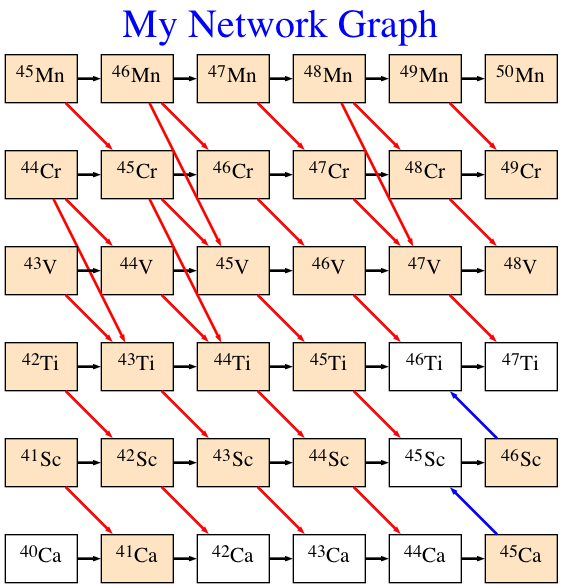

In [100]:
from IPython.display import Image
fig = Image(filename=('./test-net.png'))
fig

### Create abundance flow graph

This module will show how to create a graph showing the abundance flows between species. First, we specify the nuclides we would like to explore and set the title properties.

In [101]:
induced_nuc_xpath = "[z >= 24 and a - z >= 25 and z <= 30 and a - z <= 35]"
graph_attributes = {
    "labelloc": "t",
    "fontsize": 30,
    "fontcolor": "blue",
}

To distinguish different types of reactions, we set different types of reactions to different colors with color_tuples. 

In [102]:
color_tuples = [
    ("[(reactant = 'h1' and product = 'n') or (reactant = 'n' and product = 'h1')]", "green",),
    ("[(reactant = 'he4' and product = 'h1') or (reactant = 'h1' and product = 'he4')]", "red",),
    ("[product = 'electron']", "blue"),
]

We can also specify the vertex edge attributions. If one wants to use one species as a special element, they can set the special attributes. Here Fe56 is an example.   

In [103]:
edge_attributes = {"arrowsize": 0.2}  # This is the default anyway

special_attributes = {
    "fe56": {"fillcolor": "cyan", "shape": "oval", "style": "filled"}
}

With all of the attributes, we can start to create the flow graph.  

In [104]:
my_graphs = wg.create_zone_flow_graphs(
    net,
    zone_20,
    induced_nuc_xpath=induced_nuc_xpath,
    reaction_color_tuples=color_tuples,
    graph_attributes=graph_attributes,
    allow_isolated_species=False,
    edge_attributes=edge_attributes,
    solar_species = [],
    special_node_attributes=special_attributes,
)

9.99999874559267 999999623.6778481


Upon execution, this command will generate all the necessary ingredients for creating a graph. The graph can then be generated and saved using the following command:

In [105]:
for zone in my_graphs:
    A = nx.nx_agraph.to_agraph(my_graphs[zone])
    A.layout()
    A.draw('test_flow.png')

To view this graph, we can use a Image displayer by typing:

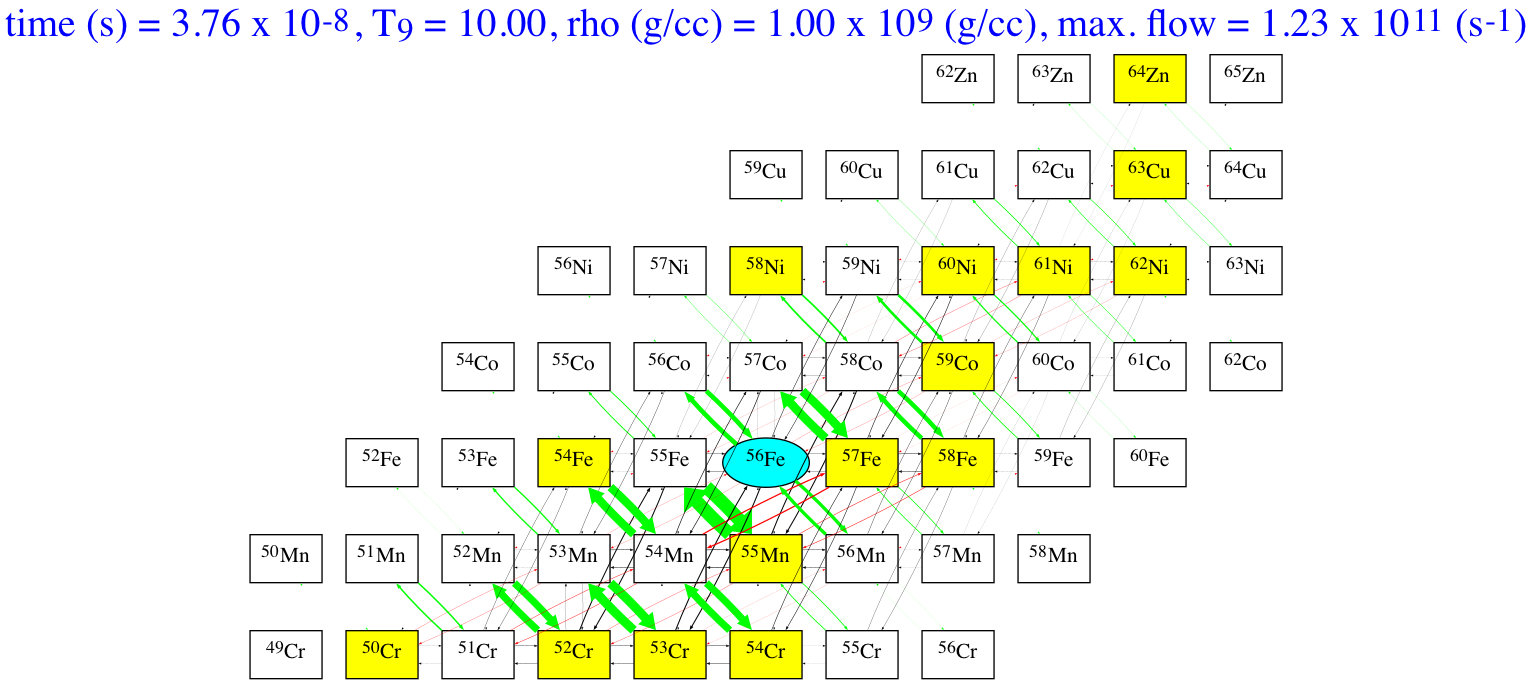

In [106]:
fig = Image(filename=('./test_flow.png'))
fig